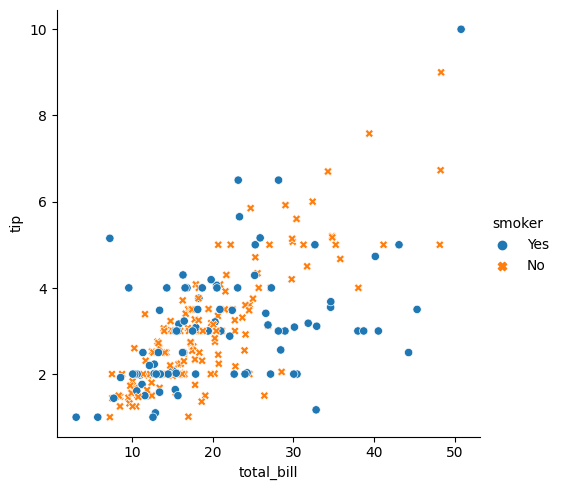

In [7]:
# seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')

tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips)

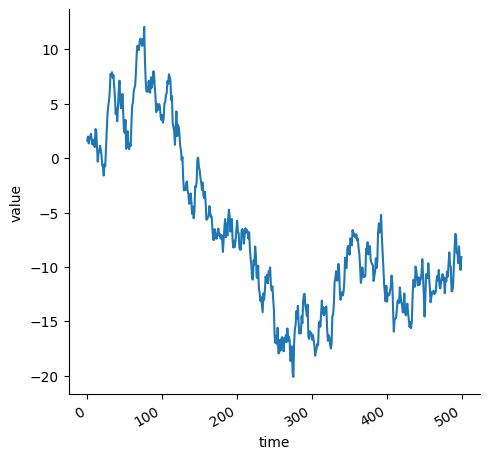

In [8]:
import numpy as np
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

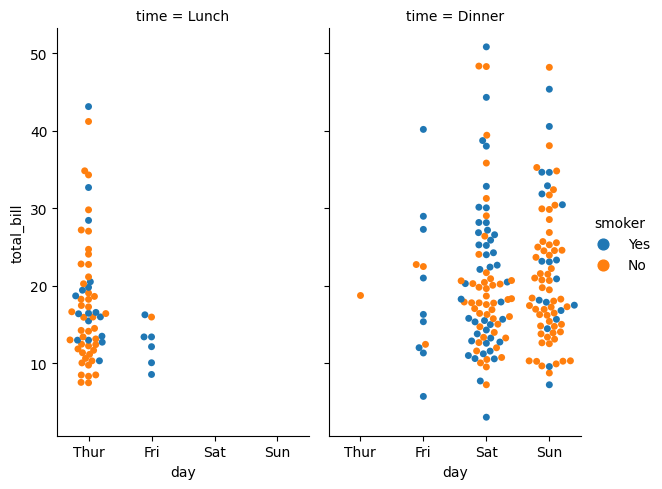

In [9]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips)

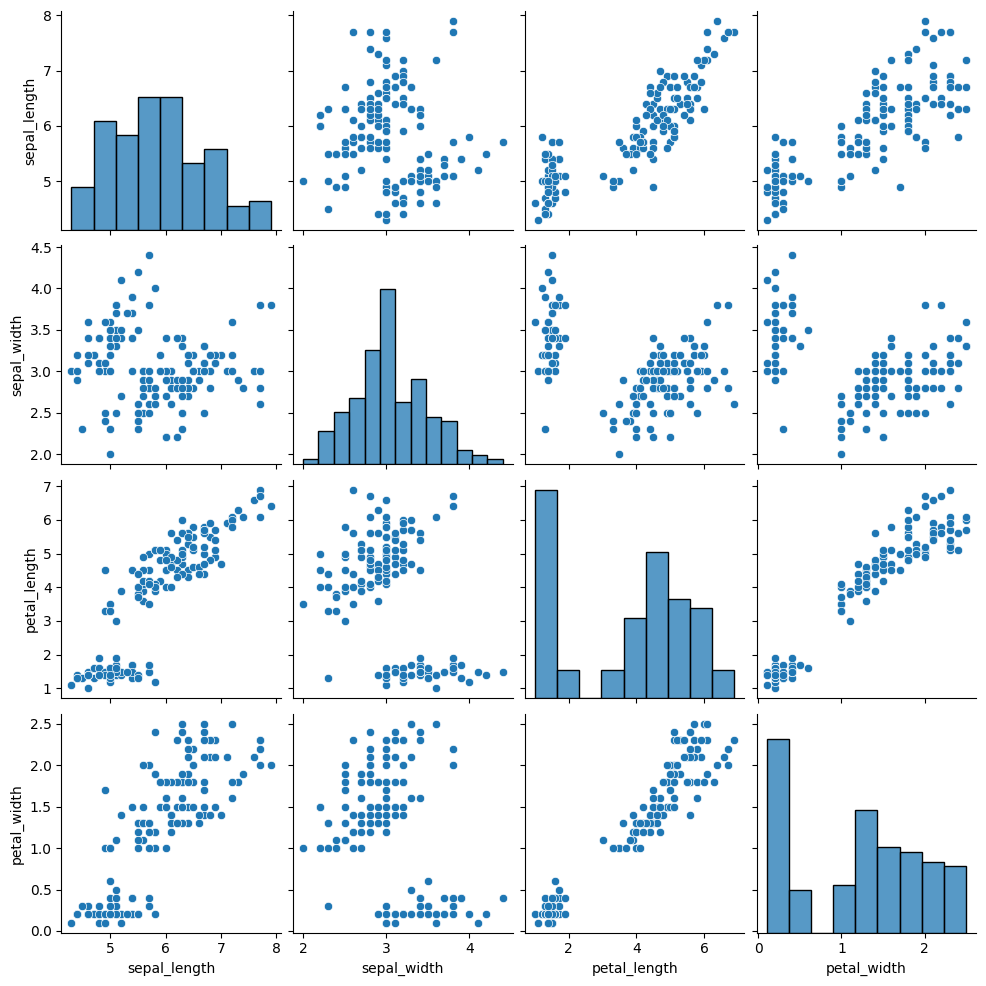

In [10]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

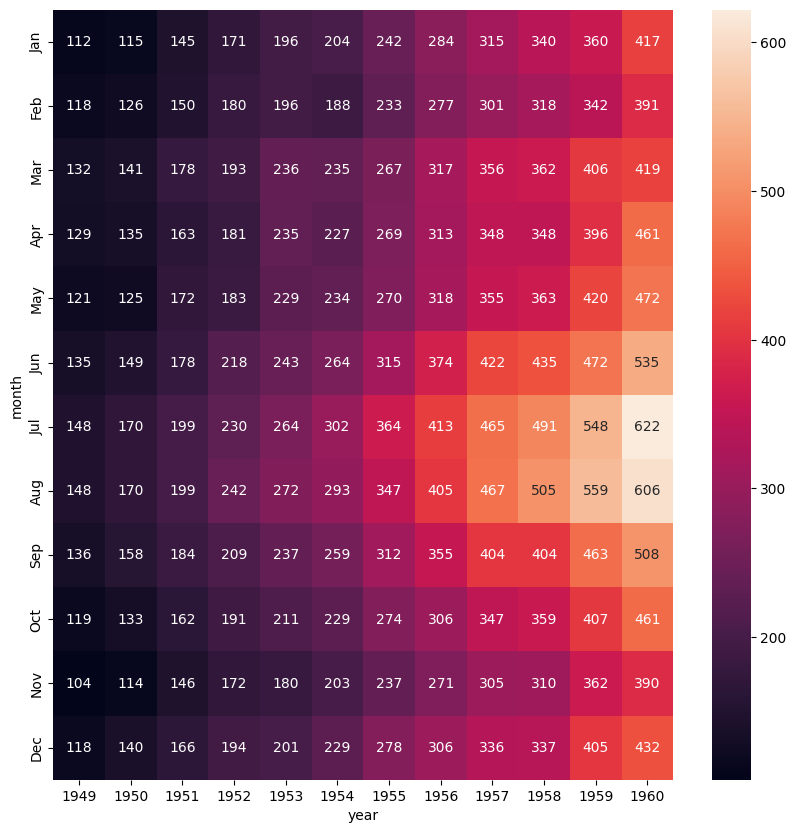

In [11]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
plt.figure(figsize=(10, 10))
ax = sns.heatmap(flights, annot=True, fmt="d")

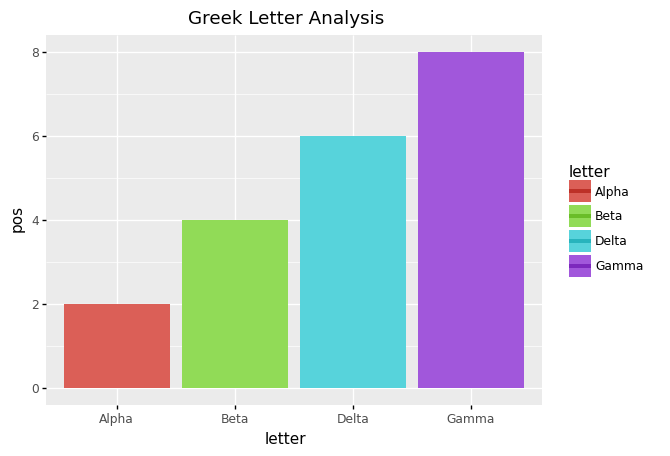

<ggplot: (-9223371939223920388)>

In [23]:
import plotnine
from plotnine import *
n = 10
df = pd.DataFrame({'x': np.arange(n),
                   'y': np.arange(n),
                   'yfit': np.arange(n) + np.tile([-.2, .2], n//2),
                   'cat': ['a', 'b']*(n//2)})
                 
(ggplot(df)
 + geom_col(aes('x', 'y', fill='cat'))
 + geom_point(aes('x', y='yfit', color='cat'))
 + geom_path(aes('x', y='yfit', color='cat'))
)

df2 = pd.DataFrame({
    'letter': ['Alpha', 'Beta', 'Delta', 'Gamma'] * 2,
    'pos': [1, 2, 3, 4] * 2,
    'num_of_letters': [5, 4, 5, 5] * 2
})

(ggplot(df2)
 + geom_col(aes(x='letter',y='pos', fill='letter'))
 + geom_line(aes(x='letter', y='num_of_letters', color='letter'), size=1)
 + scale_color_hue(l=0.45)                              
 + ggtitle('Greek Letter Analysis')
)

In [5]:
pip install folium

   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   ------------------------------------- -- 102.4/110.5 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 110.5/110.5 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
# folium
import folium

m = folium.Map(location=[37.5502, 126.982], zoom_start=14)
folium.Marker(location=[37.5502, 126.982], popup="여긴어디?",
             icon=folium.Icon(icon='cloud')).add_to(m)
folium.Marker(location=[37.5411, 127.0107], popup="한남동",
             icon=folium.Icon(color='red')).add_to(m)
m

In [1]:
pip install googlemaps

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40745 sha256=71019e929a24e9a877cc831217d1a933fada9a010b892ec1b6d3ff31c8764379
  Stored in directory: c:\users\jun05\appdata\local\pip\cache\wheels\4c\6a\a7\bbc6f5c200032025ee655deb5e163ce8594fa05e67d973aad6
Successfully built googlemaps
Note: you may need to restart the kernel to use updated packages.


In [14]:
import folium
import pandas as pd

df = pd.read_csv("경주주요관광지_LAT_LON.csv", encoding="euc-kr"  , index_col='no')
print(df)

dlon = df['lon']
dlat = df['lat']
dname=df['name']
print(dname[1])

m4 = folium.Map(location=[dlat[1], dlon[1]], zoom_start=11)

for i in range(1,len(df)+1) :

    folium.Marker(location=[dlat[i], dlon[i]], popup=dname[i],
             icon=folium.Icon(icon='cloud')).add_to(m4)
m4
#m4.save("m4.html")

         name         lon        lat  freq
no                                        
1       경주안압지  129.226560  35.834761   150
2   경주테디베어박물관  129.276937  35.851840   104
3       경주첨성대  129.219063  35.834683   120
4       경주불국사  129.332092  35.790097   100
5      경주보문단지  129.286332  35.842679    80
6       경주석굴암  129.349698  35.795086    54
7       경주천마총  129.210387  35.838736    47
8     경주엑스포광장  129.286146  35.830168    35
경주안압지


In [16]:
import folium
folium.__version__

import pandas as pd

df = pd.read_csv('seoul_older_population.csv',encoding="UTF8")
df.head()

json_data = 'seoul_older_population.geojson'

import json
with open(json_data, encoding='UTF8') as f:
    gdata = json.loads(f.read())

center = [37.541, 126.986]

m = folium.Map(location=center, zoom_start=10)

folium.Choropleth(
    geo_data=gdata, 
    data=df, 
    columns=('동명', '노인총인구수'),
    key_on='feature.properties.동',
    fill_color='OrRd',
    legend_name='동별 노령 총 인구수',
).add_to(m)
m
#m.save("c:\\temp\\fmap_1.html")

In [18]:
import folium
import pandas as pd

df = pd.read_csv('seoul_older_population.csv',encoding="UTF8")
df.head()

import json
json_data = 'seoul_older_population.geojson'

with open(json_data, encoding='UTF8') as f:
    gdata = json.loads(f.read())

df_gu = df.groupby(['구명'])['노인총인구수'].sum().to_frame().reset_index()

center = [37.541, 126.986]
m = folium.Map(location=center, zoom_start=10)

folium.Choropleth(
    geo_data=gdata,
    data=df_gu, 
    columns=('구명', '노인총인구수'),
    key_on='feature.properties.구',
    fill_color='OrRd',
    legend_name='동별 노령 총 인구수',
).add_to(m)
m
#m.save("c:\\temp\\fmap_ex2.html")